# A time series analysis of United States production of Soy farm Using R

* Soybean oil finds its way into food products such as margarine, salad dressings and cooking oils, and industrial products such as plastics and biodiesel fuel. Lecithin, extracted from soybean oil, is used for everything from pharmaceuticals to protective coatings. 
* It is a natural emulsifier and lubricant. Lecithin is used, for example, to keep the chocolate and cocoa butter in a candy bar from separating. 
* Unlike many other oilseed crops, U.S. soybean production is wide-spanning and diverse. Eighty million acres of soybeans grown across the U.S. means soybeans are always readily available to meet the food industry and consumers’ ingredient needs, despite inclement weather. 
* Soybean farms sit among the 97% of family owned farms in the U.S. Soybean farmers use innovative practices, including regenerative farming, to grow sustainable beans on more than 300,000 farms across 45 states. U.S. soybean farms are thriving and will continue to keep up with demand for soybean ingredients, including soybean oil, high oleic soybean oil, soybean shortenings and soy protein. 


## 	About data
The data that is obtained consists of 130 entries, starting from June 2007 to March 2018. The data is obtained from <a href='https://www.kaggle.com/ainslie/usda-wasde-monthly-corn-soybean-projections'> Kaggle.com </a>.
The data that is taken into consideration is the production of Soy crop in the United States of America. The unit is in million bushels.


## Procedure and Analysis

### Importing necessary libraries

In [1]:
library(readxl)
SoyPricedetails <- read_excel("C:/Users/Irene Mathews/Documents/R/SoyPricedetails.xlsx")


Warning message:
"package 'readxl' was built under R version 3.6.2"

In [2]:
library(tseries)
library(astsa)
library(dplyr)


Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'astsa' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



###  Splitting the data 
According to training and testing data, since we aim to forecast only the data of the last 5 values, we split it in such a way that the train has all the data other than the last 5.\
The time series model is fit into this set of training data.


In [3]:
split=as.integer(count(SoyPricedetails)-5)
# making sure that the test dataset is of 5 rows
train<-SoyPricedetails$`United States Production`[1:split]
test<-SoyPricedetails$`United States Production`[-(1:split)]
summary(train)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  70.36   83.17   89.51   90.12   92.26  120.59 

We can see from the summary statistics that the minimum production of the Soy throughout the years was 70.36 million bushels in one of the months, and the maximum was 120.59 million bushels.

### Converting the data into a time series data

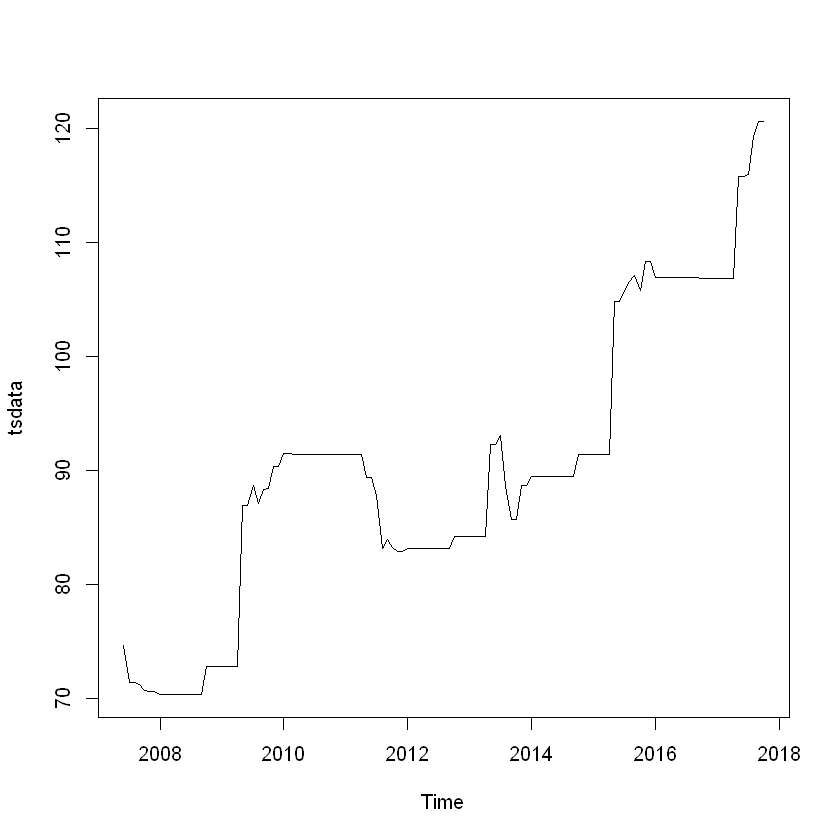

In [4]:
tsdata<-ts(train,start = c(2007,6),frequency = 12)
ts.plot(tsdata)


The plot shows presence of Trend and no seasonality. Since trend is present, we can easily say that the data is non-stationary
### Making the data stationary:
We need to make sure that the is stationary. This is because, the assumptions are such that there is constant mean, finite variance and the covariance is dependent on the lag(auto-covariance) \
So we check if the data is stationary using Augmented Dickey-Fuller test.


In [5]:
adf.test(tsdata)


	Augmented Dickey-Fuller Test

data:  tsdata
Dickey-Fuller = -1.5399, Lag order = 4, p-value = 0.7677
alternative hypothesis: stationary


The p-value was found to be more than 0.05, which means that the data is non-stationary(null-hypothesis). So we do differencing.

In [6]:
sd=diff(tsdata)
adf.test(sd)

Warning message in adf.test(sd):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  sd
Dickey-Fuller = -5.2217, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


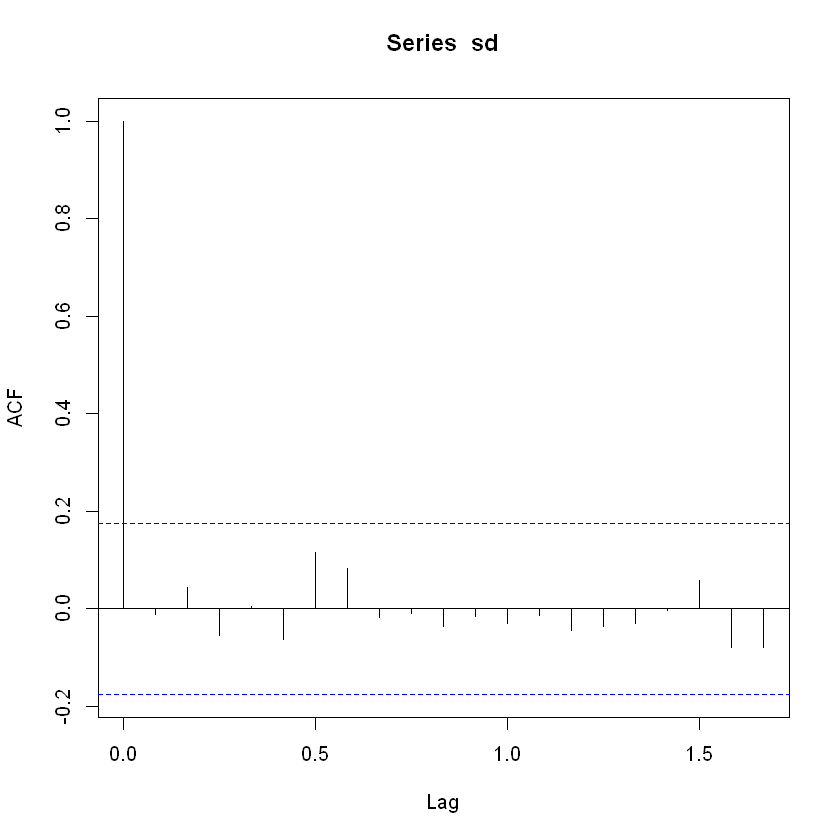

In [7]:
acf(sd)

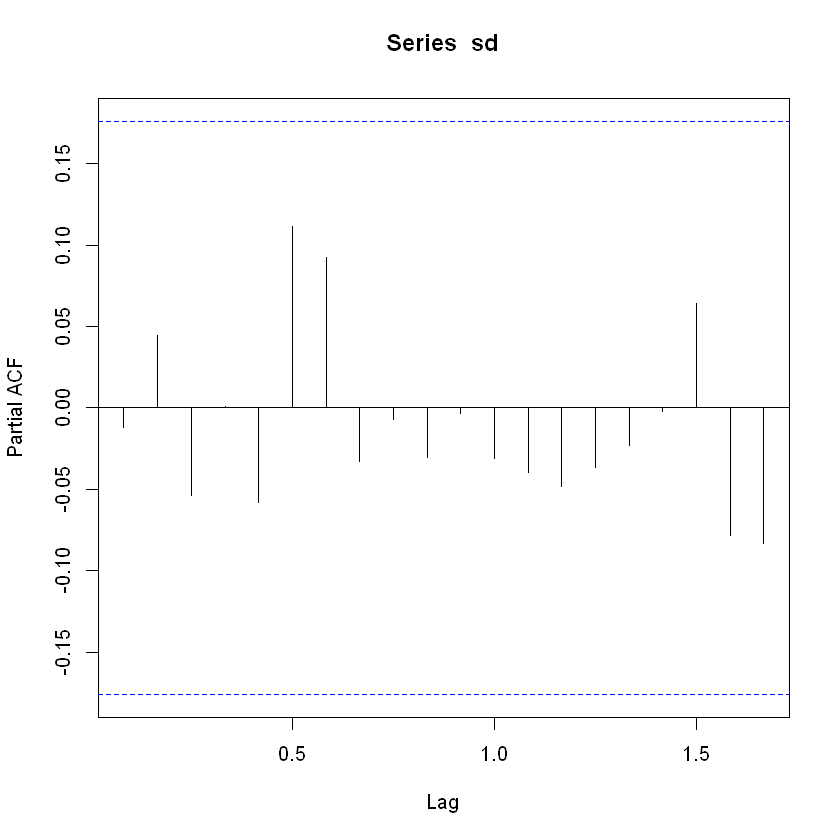

In [8]:
pacf(sd)

The data is found to be stationary since the ADF test gave a p-value below 0.05 and the ACF and PACF plot gives intuitive result. \
Apparently, the data shows that it is lacking time dependence. But we shall fit a model with a model according to the AIC value
### Fitting the model
Using trace, we find the 5 suitable models that shows the least AIC value. 


In [9]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"
Attaching package: 'forecast'

The following object is masked from 'package:astsa':

    gas



In [10]:
fit=auto.arima(tsdata,seasonal = FALSE,trace = TRUE)


 ARIMA(2,1,2)            with drift         : 565.4705
 ARIMA(0,1,0)            with drift         : 558.0152
 ARIMA(1,1,0)            with drift         : 560.0973
 ARIMA(0,1,1)            with drift         : 560.0989
 ARIMA(0,1,0)                               : 559.2323
 ARIMA(1,1,1)            with drift         : 562.2479

 Best model: ARIMA(0,1,0)            with drift         



Apart from the model without Auto-regression or moving average, we fit the model with order (1,1,0) since it gives the lesser AIC value.

In [11]:
fit=arima(tsdata,order = c(1,1,0) )
fit



Call:
arima(x = tsdata, order = c(1, 1, 0))

Coefficients:
         ar1
      0.0165
s.e.  0.0902

sigma^2 estimated as 5.235:  log likelihood = -278.58,  aic = 561.17

### Residual

The fitted models needs to be checked if it has any issues with following the conventional assumptions about the white noise(residuals).\
So we need to check if the data is
*	Uncorrelated
*	Normal 
First we find the residuals


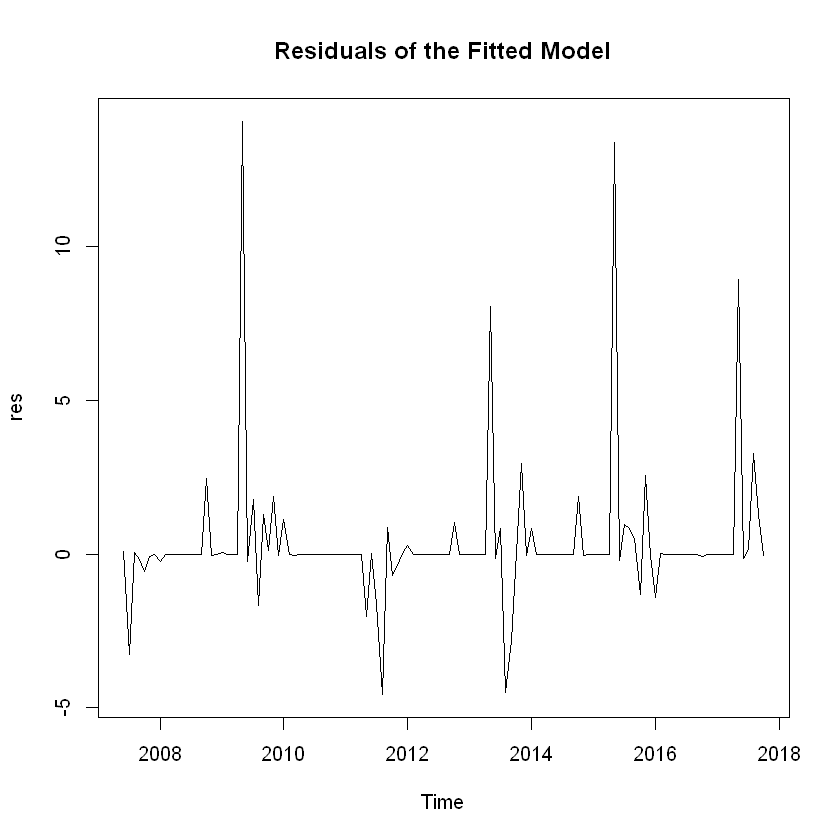

In [12]:
# to obtain the residuals from the fitted model
res=residuals(fit)
plot(res,main="Residuals of the Fitted Model")


Then, we check if the data is uncorrelated. For that we plot the ACF plot. From the ACF plot, as you can see, since other than at lag = 0, the values are less, so it shows uncorrelation. So the first condition is met.

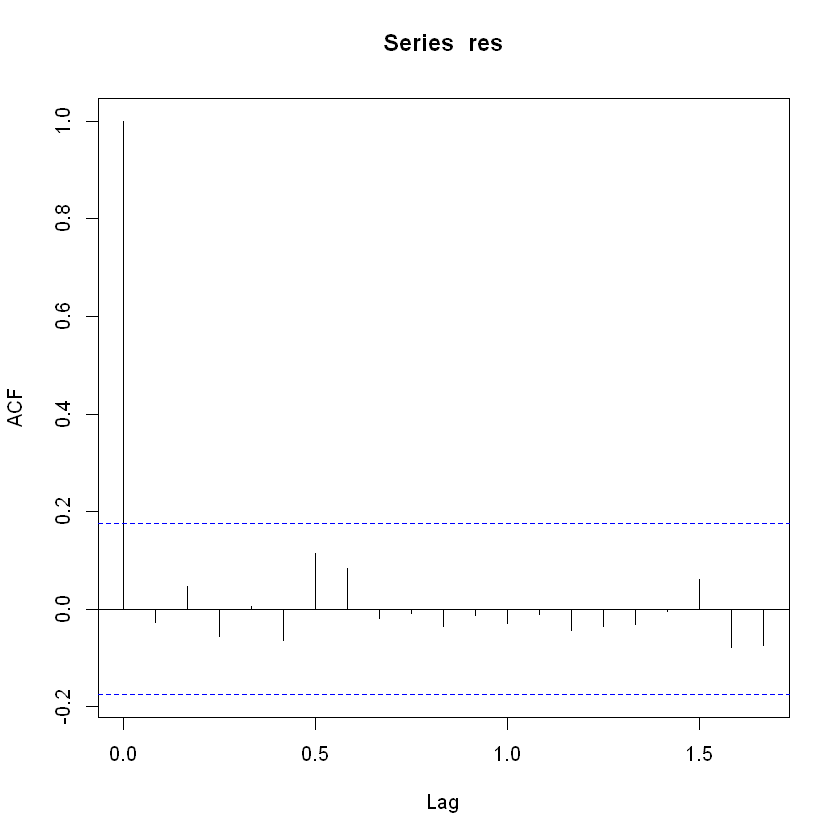

In [13]:
acf(res)

So the residuals are not correlated

For checking the normality, we use 
*	QQ-plot
*	 Hypothesis tests


In [14]:
# this shows zero creelation among the residuals
library(olsrr)


Warning message:
"package 'olsrr' was built under R version 3.6.3"
Attaching package: 'olsrr'

The following object is masked from 'package:datasets':

    rivers



In [15]:
library(ggpubr)

Warning message:
"package 'ggpubr' was built under R version 3.6.2"Loading required package: ggplot2
Loading required package: magrittr

Attaching package: 'ggpubr'

The following object is masked from 'package:forecast':

    gghistogram



Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.


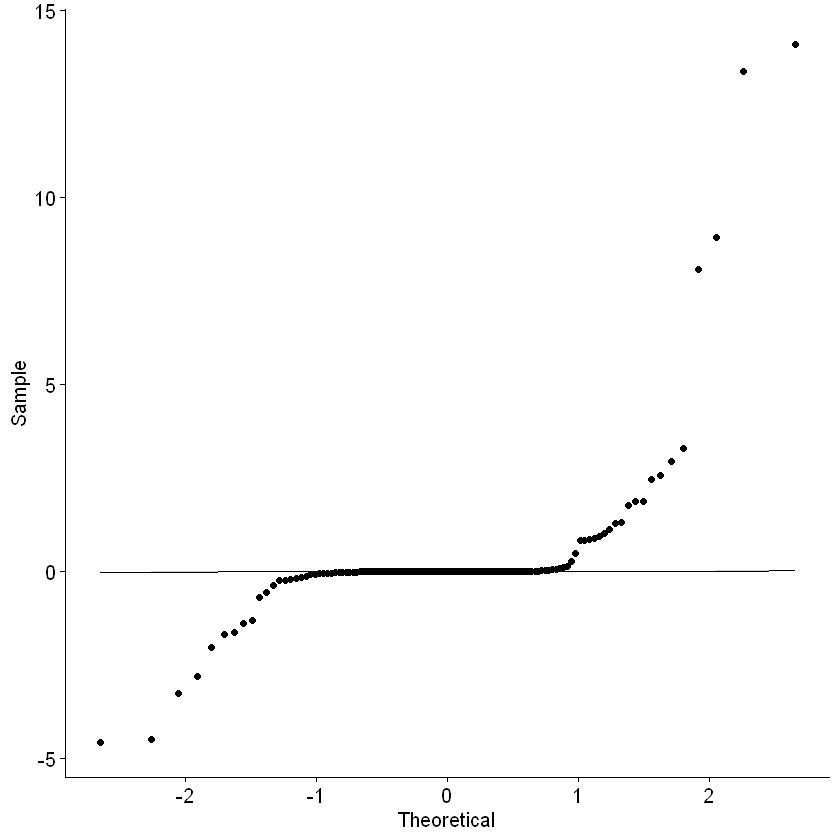

In [16]:
ggqqplot(res)

In [17]:
ols_test_normality(res)

Warning message in ks.test(y, "pnorm", mean(y), sd(y)):
"ties should not be present for the Kolmogorov-Smirnov test"

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.478          0.0000 
Kolmogorov-Smirnov        0.3631         0.0000 
Cramer-von Mises          22.978         0.0000 
Anderson-Darling         24.4914         0.0000 
-----------------------------------------------

The null hypothesis for normality should have more than 0.05 as p-value. \But since the values are less than 0.05, the data doesn’t show normality.\
We see that there is need for transformation of the time series data. So we go for Box-Cox Transformation
### Box Cox transformation in the Time series data
The Box-Cox transformation is a family of power transformations indexed by a parameter lambda. Whenever you use it the parameter needs to be estimated from the data.\
The BoxCox.lambda() function, will provide us an optimal value for parameter lambda:

In [18]:
lambda <- BoxCox.lambda(tsdata)
print(lambda)


[1] 0.79291


So we transfer the data using the lambda value and simultaneously convert the data to a time series data \
And we repeat the steps
#### Converting to time series


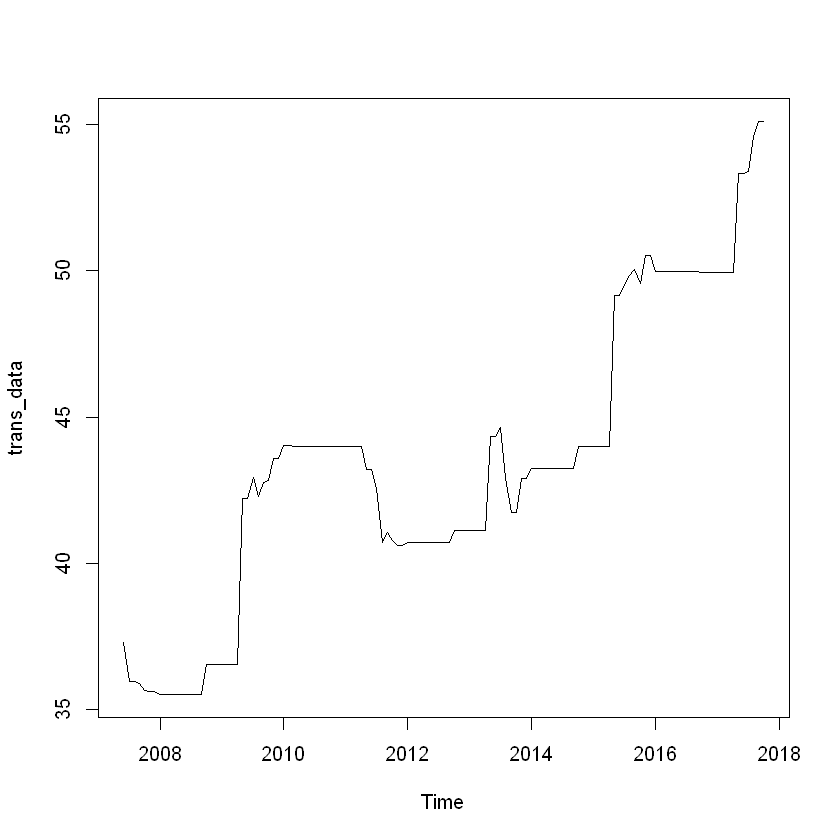

In [19]:
trans_data=ts(BoxCox(tsdata, lambda = lambda),start = c(2007,6),frequency = 12)
ts.plot(trans_data)


#### Converting data to a stationary series

In [20]:
adf.test(trans_data)


	Augmented Dickey-Fuller Test

data:  trans_data
Dickey-Fuller = -1.5908, Lag order = 4, p-value = 0.7466
alternative hypothesis: stationary


In [21]:
sd=diff(trans_data)
adf.test(sd)


Warning message in adf.test(sd):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  sd
Dickey-Fuller = -5.2264, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


#### Fitting the model

In [22]:
library(forecast)
trans_fit=auto.arima(trans_data,seasonal = FALSE,trace = TRUE)


 ARIMA(2,1,2)            with drift         : 334.025
 ARIMA(0,1,0)            with drift         : 326.6116
 ARIMA(1,1,0)            with drift         : 328.6944
 ARIMA(0,1,1)            with drift         : 328.6959
 ARIMA(0,1,0)                               : 327.7434
 ARIMA(1,1,1)            with drift         : Inf

 Best model: ARIMA(0,1,0)            with drift         



In [23]:
trans_fit=arima(trans_data,order = c(1,1,0))
trans_fit



Call:
arima(x = trans_data, order = c(1, 1, 0))

Coefficients:
         ar1
      0.0161
s.e.  0.0902

sigma^2 estimated as 0.8094:  log likelihood = -162.84,  aic = 329.68

#### Residual Analysis

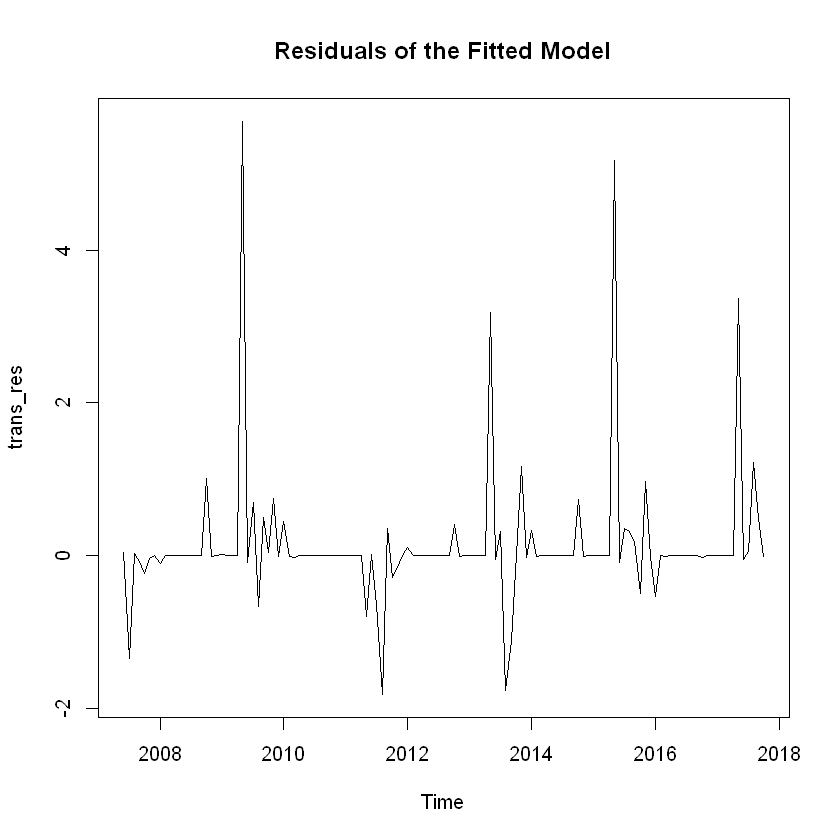

In [24]:
# to obtain the residuals from the fitted model
trans_res=residuals(trans_fit)
plot(trans_res,main="Residuals of the Fitted Model")


##### Checking for non correlation

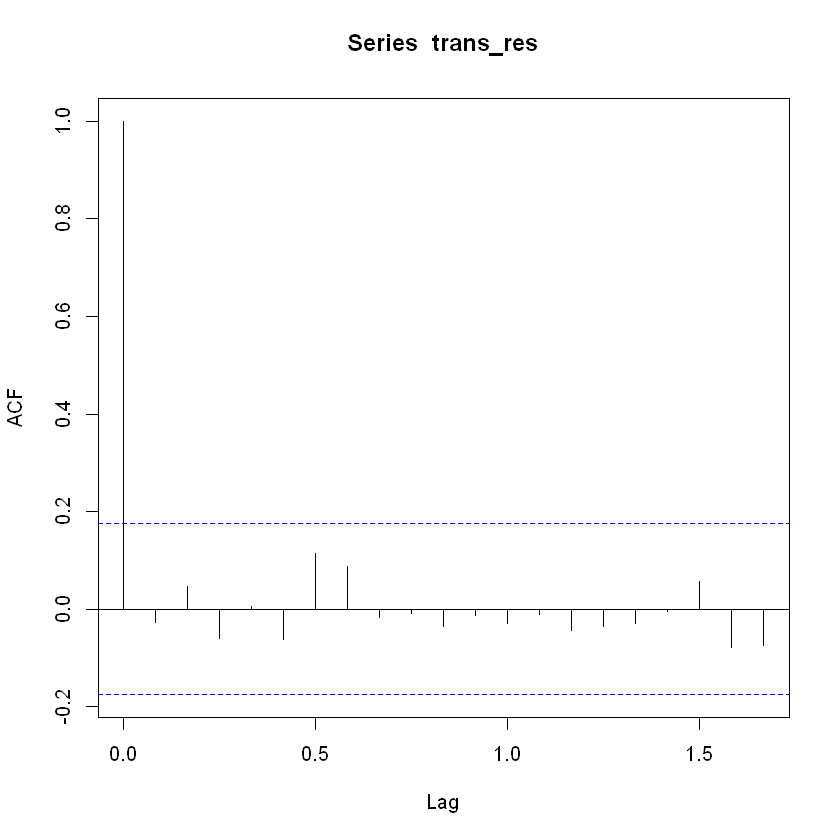

In [25]:
acf(trans_res)

##### Checking for normality

In [38]:
# this shows zero correlation among the residuals
#install.packages('olsrr')
library(olsrr)
ols_test_normality(trans_res)


Warning message in ks.test(y, "pnorm", mean(y), sd(y)):
"ties should not be present for the Kolmogorov-Smirnov test"

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.4781         0.0000 
Kolmogorov-Smirnov        0.3635         0.0000 
Cramer-von Mises         26.1461         0.0000 
Anderson-Darling         24.4632         0.0000 
-----------------------------------------------

Since the transformed model shows the exact same result as that of the original data, we use then original data itself for the in-sample forecasting.
### Forecasting
Time series forecasting is the use of a model to predict future values based on previously observed values.
*	In-sample forecasting \
We had initially split the data into train and test. So from the training data, we fitted a model and now we are going to forecast the next 5 values. We compare these 5 values with the 5 values in the test data.
Using error sum of squares, we find the error of the data. Lesser the error, better the model.


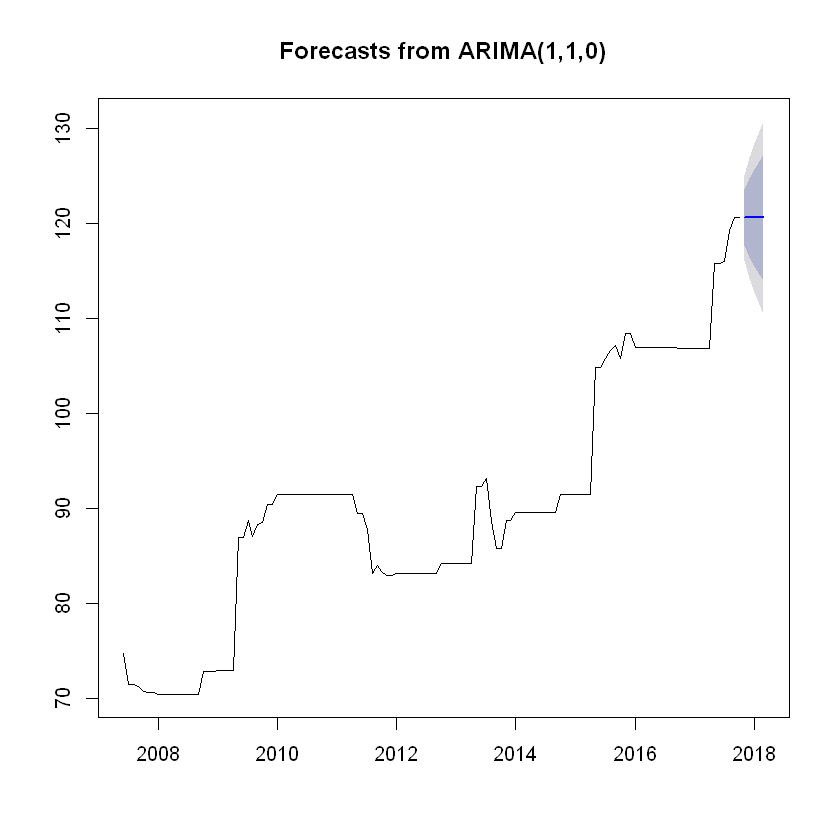

In [39]:
insample_forecast=forecast(fit,h=5)
plot(insample_forecast)


Comparing the forecasted values to the actual values

In [40]:
a=data.frame(insample_forecast)
error=sum(a$Point.Forecast-test, lambda = lambda)^2 
# Root mean square error
#error=(sum(a$Point.Forecast-test, lambda = lambda)^2 / count(a))^(1/2)
error


[1] 18.08015

The error sum of squares was found to be 18.08015 units.  \
Before we go for out-sample forecasting, let us try fitting another model just so that we can have a comparison and use a model that gives out lesser error. 
### Holts Winters exponential smoothing
Holt-Winters forecasting is a way to model and predict the behaviour of a sequence of values over time—a time series. Holt-Winters is one of the most popular forecasting techniques for time series. \
Holt-Winters uses exponential smoothing to encode lots of values from the past and use them to predict the values for the present and future.

#### Fitting the model from the training time series data

In [41]:
#Holts Winters exponential smoothing
trainforecasts=HoltWinters(tsdata)
trainforecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = tsdata)

Smoothing parameters:
 alpha: 0.8978597
 beta : 0.008031618
 gamma: 1

Coefficients:
            [,1]
a   120.81522335
b     0.34786681
s1    0.91485328
s2    0.42138353
s3    0.04341722
s4   -0.05276503
s5   -0.08605106
s6   -0.09432757
s7    2.88326807
s8    0.88070954
s9    0.06531138
s10  -0.70665455
s11  -1.09066656
s12  -0.23522335

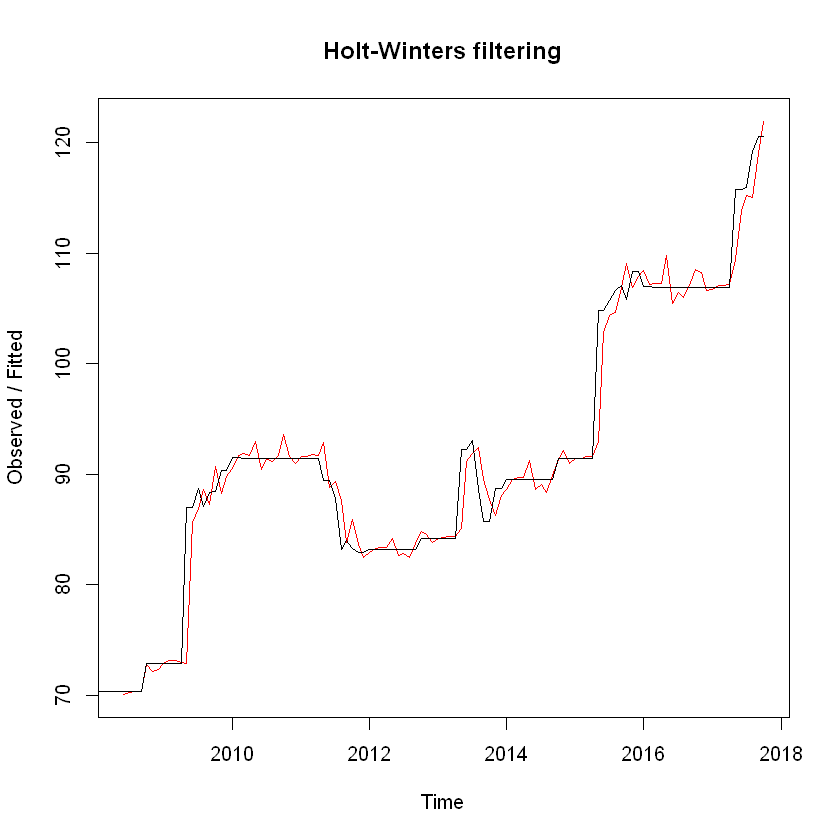

In [42]:
plot(trainforecasts)

#### 	Forecasting the next 5 years of data.

In [43]:
forecast_data=forecast(trainforecasts,h=5)
forecast_data

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Nov 2017       122.0779 119.0748 125.0811 117.4851 126.6708
Dec 2017       121.9323 117.8818 125.9828 115.7376 128.1270
Jan 2018       121.9022 117.0122 126.7923 114.4236 129.3809
Feb 2018       122.1539 116.5381 127.7698 113.5652 130.7426
Mar 2018       122.4685 116.2009 128.7361 112.8830 132.0540

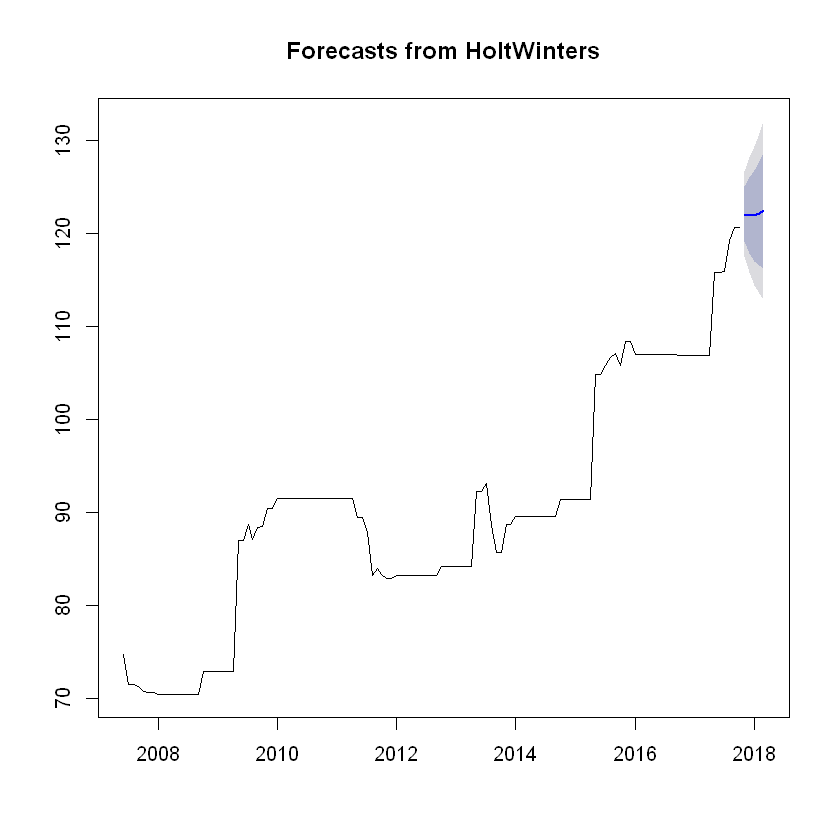

In [44]:
plot(forecast_data)

Comparing the forecasted values to the actual values

In [45]:
forecast_indataframe=data.frame(forecast_data)
error=sum(forecast_indataframe$Point.Forecast-test)
error


[1] 11.09496

The error in the ARIMA (1,1,0) is more than that of the Holt-Winter Exponential smoothing model. \
Hence we can proceed for out-sample forecasting with the model obtained from Holt-Winter Exponential smoothing
### Out-sample Forecasting:
The out-sample forecasting is done by determining the next 5 terms that does not exist in the time series data yet
For out-sample, we need to have the enitre data data.


In [46]:
#Holts Winters exponential smoothing
data<- ts(SoyPricedetails$`United States Production`,start = c(2007,6),frequency = 12)
trainforecasts=HoltWinters(data)
trainforecasts

forecast_data=forecast(trainforecasts,h=5)
forecast_data


Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = data)

Smoothing parameters:
 alpha: 0.9016075
 beta : 0.005505674
 gamma: 1

Coefficients:
            [,1]
a   119.61061196
b     0.28020860
s1   -0.06962027
s2    2.82793968
s3    0.84153882
s4    0.05316929
s5   -0.70259974
s6   -1.05697138
s7   -0.16320542
s8    0.79124588
s9    0.43573453
s10  -0.02603097
s11  -0.06281729
s12  -0.09061196

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Apr 2018       119.8212 116.8734 122.7690 115.3129 124.3295
May 2018       122.9990 119.0201 126.9779 116.9138 129.0842
Jun 2018       121.2928 116.4915 126.0940 113.9499 128.6357
Jul 2018       120.7846 115.2754 126.2938 112.3590 129.2102
Aug 2018       120.3091 114.1666 126.4515 110.9150 129.7031

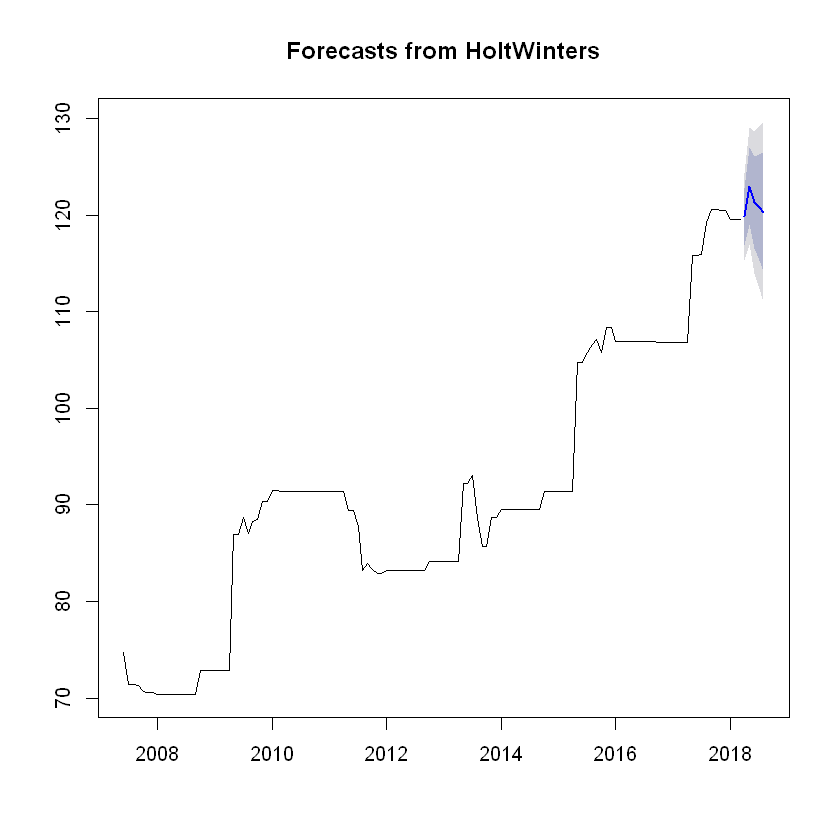

In [47]:
plot(forecast_data)

In [48]:
forecast_indataframe=data.frame(forecast_data)
forecast_indataframe

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Apr 2018,119.8212,116.8734,122.7690,115.3129,124.3295
May 2018,122.9990,119.0201,126.9779,116.9138,129.0842
Jun 2018,121.2928,116.4915,126.0940,113.9499,128.6357
Jul 2018,120.7846,115.2754,126.2938,112.3590,129.2102
Aug 2018,120.3091,114.1666,126.4515,110.9150,129.7031


## Conclusion:
Time series is a very important aspect when ti comes to usage in real time scenarios. The data training needs to be more dynamic when the amount of data coming into the dataset increases. The optimum models to be identified is a very important task. Training the data to find the model giving the least error is the aim for a model developer. \
Here the data shows more reasonable forecast when Holt Winter’s exponential smoothing is done. \
The forecast shows a high upward trend throughout the years, which means that the demand for Soy increases and the consumption is also high.  \
This is due to the increasing research in the health benefits soy provides and the other benefits as well which includes animal protection. This shows the increase in the number of vegans throughout the years since they consume Soy as a substitute for a lot of different food items. 
